[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NVlabs/ODISE/blob/master/demo/demo.ipynb)

# Install and setup

In [1]:
# Uncomment following if you are running this notebook on Google Colab
# !pip uninstall torchtext -y
# !pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu116
# !pip install git+https://@github.com/NVlabs/ODISE.git

In [1]:
from contextlib import ExitStack
import torch
from PIL import Image
import numpy as np

from detectron2.config import instantiate
from detectron2.evaluation import inference_context
from detectron2.utils.env import seed_all_rng

import sys
import os

sys.path.append(os.path.abspath(".."))

from odise import model_zoo
from odise.checkpoint import ODISECheckpointer
from odise.config import instantiate_odise



/home/r1-user/miniconda3/envs/odise/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Model

In [2]:

# cfg = model_zoo.get_config("Panoptic/odise_label_coco_50e.py", trained=True)
cfg = model_zoo.get_config("Panoptic/odise_caption_coco_50e.py", trained=True)

cfg.model.overlap_threshold = 0
seed_all_rng(42)

dataset_cfg = cfg.dataloader.test
# wrapper_cfg = cfg.dataloader.wrapper

aug = instantiate(dataset_cfg.mapper).augmentations

model = instantiate_odise(cfg.model)
model.set_augmentation(aug)
model.to(cfg.train.device)
ODISECheckpointer(model).load(cfg.train.init_checkpoint)
"finished loading model"

/home/r1-user/lgori/ODISE-mod/odise/model_zoo/configs/Panoptic/odise_caption_coco_50e.py


A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/r1-user/miniconda3/envs/odise/lib/python3.9/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.clip.clip.ln_final.{bias, weight}
backbone.feature_extractor.clip.clip.token_embedding.weight
backbone.feature_extractor.clip.clip.transformer.resblocks.0.attn.out_proj.{bias, weight}
backbone.feature_extractor.clip.clip.transformer.resblocks.0.attn.{in_proj_bias, in_proj_weight}
backbone.feature_extractor.clip.clip.transformer.resblocks.0.ln_1.{bias, weight}
backbone.feature_extractor.clip.clip.transformer.resblocks.0.ln_2.{bias, weight}
backbone.feature_extractor.clip.clip.transformer.resblocks.0.mlp.c_fc.{bias, weight}
backbone.feature_extractor.clip.

'finished loading model'

Define model predict function

Let try a COCO image

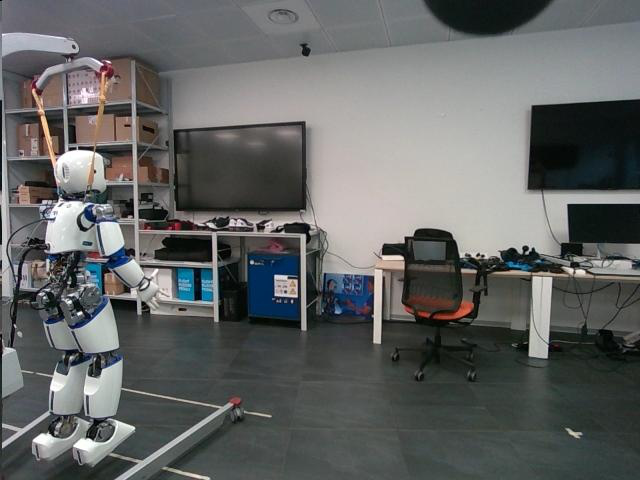

In [3]:
# input_image = Image.open(requests.get("http://images.cocodataset.org/val2017/000000467848.jpg", stream=True).raw)
input_image = Image.open("25.jpg")
input_image

In [4]:
input_image.size

# new_width = int(input_image.width * 0.2)
# new_height = int(input_image.height * 0.2)
# new_size = (new_width, new_height)

# # Resize the image
# shrunk_image = input_image.resize(new_size, Image.Resampling.LANCZOS)

# # Save the resized image
# shrunk_image.save("screwdrivers-mini.jpg")
# shrunk_image.size

(640, 480)

In [5]:
# vocab = "black pickup truck, pickup truck; blue sky, sky; road; tree"
# vocab = "chair; floor; ceiling; wall; table; tv; light; display; person; robot; other"

# vocab = "cat; dog; person, human, man, woman, boy, child; floor, ground; wall; tv, monitor; book; cup; light; curtains"
# vocab = "chair; picture; floor; ceiling; robot; table; monitor; wall; laptop; screen; computer; tv; shelf; desk; window; person; other"

# vocab = "person; man; woman; child; cross; candles; ground; sky; cloud; wall; fire"

# vocab = "floor; ceiling; wall; table; laptop; lamp; plant; vase; jar; panel; couch; sofa; carpet; door"

In [6]:
# vocab = "cat; dog; person; floor; wall; tv; book; cup; light; curtains"
# vocab = "two cats are watching dog and person in the tv…"

import time
start = time.time()

with ExitStack() as stack:

    stack.enter_context(inference_context(model))
    stack.enter_context(torch.no_grad())

    featured_image = model.get_image_embeddings(np.array(input_image))

print(time.time() - start)

/home/r1-user/miniconda3/envs/odise/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


5.871392250061035


In [7]:
featured_image.shape

torch.Size([480, 640, 1024])

# Query the embeddings

In [8]:
# vocab = "chair; picture; ceiling light; lamp; ground; ceiling; robot; table; monitor; wall; floor; person; laptop; keyboard; mouse; screen; computer; tv; monitor; display; desk; window; shelf; other; others"

# vocab = "chair; picture; floor; ceiling; robot; table; monitor; wall; laptop; screen; computer; tv; shelf; desk; window; person; other"

# vocab = "person; man; woman; child; cloud; angel; stairs; floor; column; tree; arch; sky; wall; animal"

# vocab = "person; man; woman; child; cloud; angel; stairs; floor; column; tree; sky; ground; wall"
vocab = "chair; ceiling; robot; tv; table; wall; floor; person; laptop; shelf; monitor; computer; window; picture; screen; desk; other"
# vocab = "floor; ceiling; wall; table; laptop; lamp; plant; vase; jar; couch; sofa; carpet; door"

# vocab = "screwdriver; floor"

word_lists = vocab.split("; ")

colors = ""
# colors = "white; green; red; blue; yellow; orange; cyan"

category_list = []

if colors:
    color_list = colors.split("; ")
    
for wl in word_lists:
    category_list.append([w for w in wl.split(", ")])
    if colors:
        for c in color_list:
            category_list.append([f"{c} {w}" for w in wl.split(", ")])

# projected_embeddings = word_embedder.text_proj(embeddings).cpu().detach()

In [9]:
import matplotlib.pyplot as plt

colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(category_list)))

label_index_to_color_dict = {i: torch.tensor(colors[i]) for i in range(len(category_list))}

# Initialize open_seg_mask

open_seg_mask = torch.zeros(featured_image.shape[0], featured_image.shape[1], 4)

max_indices = model.get_segmentation(category_list, featured_image)

# Update open_seg_mask using tensor indexing
open_seg_mask = torch.stack([label_index_to_color_dict[idx.item()] for idx in max_indices.flatten()]).view(open_seg_mask.shape)

In [10]:
open_seg_mask.shape

torch.Size([480, 640, 4])

In [11]:
input_image.size

(640, 480)

In [12]:
detected_categories = torch.unique(max_indices)
detected_categories

tensor([ 0,  1,  2,  3,  5,  6,  9, 13, 14, 15, 16], device='cuda:0')

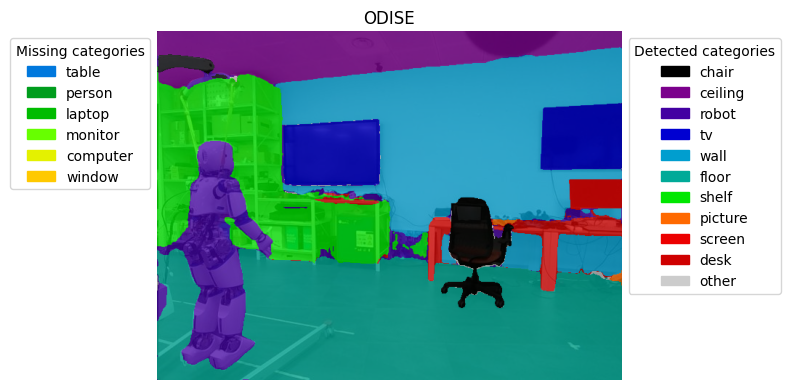

In [13]:
fig, ax = plt.subplots()

plt.imshow(input_image)
plt.imshow(open_seg_mask, alpha=.75)

found_categories_legend = ax.legend(handles=[plt.Rectangle((0,0),1,1, color=np.array(label_index_to_color_dict[int(i)]),                                                       
                                        label=[w for wl in category_list for w in wl][int(i)]) for i in range(len(category_list)) if i in detected_categories],
                                        title = "Detected categories",   
                                        loc='upper left', bbox_to_anchor=(1, 1),
                                        )

missing_categories_legend = plt.legend(handles=[plt.Rectangle((0,0),1,1, color=np.array(label_index_to_color_dict[int(i)]),
                                        label=[w for wl in category_list for w in wl][int(i)]) for i in range(len(category_list)) if i not in detected_categories],
                                        title= "Missing categories",
                                        loc='upper right', bbox_to_anchor=(0, 1),
                                        )

# Manually add the first legend back to the plot
fig.add_artist(found_categories_legend)

format = "svg"

plt.title("ODISE")
plt.axis("off")
plt.tight_layout()

plt.savefig(f'odise.{format}', format=format, bbox_inches='tight')

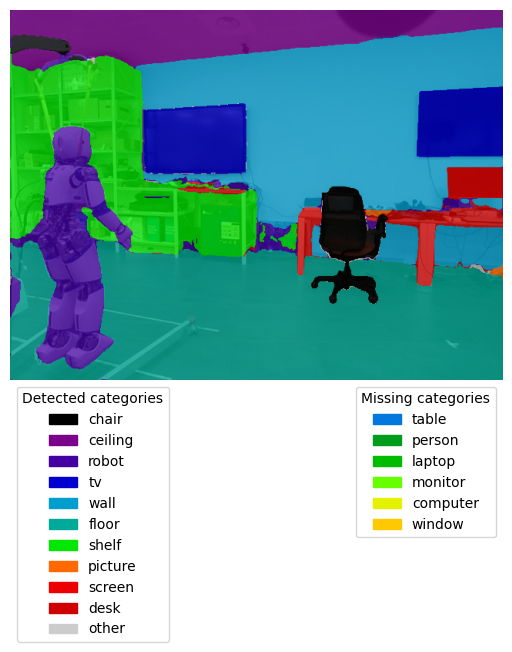

In [14]:
fig, ax = plt.subplots()

plt.imshow(input_image)
plt.imshow(open_seg_mask, alpha=.75)
# found_categories_legend.remove()

found_categories_legend = ax.legend(handles=[plt.Rectangle((0,0),1,1, color=np.array(label_index_to_color_dict[int(i)]),                                                       
                                        label=[w for wl in category_list for w in wl][int(i)]) for i in range(len(category_list)) if i in detected_categories],
                                        title = "Detected categories",   
                                        loc='upper left', bbox_to_anchor=(0, 0),
                                        )

missing_categories_legend = plt.legend(handles=[plt.Rectangle((0,0),1,1, color=np.array(label_index_to_color_dict[int(i)]),
                                        label=[w for wl in category_list for w in wl][int(i)]) for i in range(len(category_list)) if i not in detected_categories],
                                        title= "Missing categories",
                                        loc='upper right', bbox_to_anchor=(1, 0),
                                        )

# Manually add the first legend back to the plot
fig.add_artist(found_categories_legend)

# plt.tight_layout()

plt.axis("off")

plt.show()

# plt.legend(handles=[plt.Rectangle((0,0),1,1, color=np.array(label_index_to_color_dict[int(i)]), label=[w for wl in word_list for w in wl][int(i)]) for i in range(len(embeddings))], loc='upper left', bbox_to_anchor=(1, 1))